In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Chemin du fichier Excel
file_path = "C:\\Users\\MM_DATA\\Desktop\\PIST\\Prediction\\Etat_des_sorties_final.xlsx"

# Lecture du fichier Excel
data = pd.read_excel(file_path)

# Affichage des premières lignes pour vérification
print(data.head())


   N° B.C  N° B.L                                  MARKETER  N° B.E.C  \
0    8943    8355  TOTALENERGIES MARKETING TOGO              30427577   
1    8944    8356  TOTALENERGIES MARKETING TOGO              30427578   
2    8945    8357  TOTALENERGIES MARKETING TOGO              30427578   
3    8946    8358  TOTALENERGIES MARKETING TOGO              30427579   
4    8947    8359  TOTALENERGIES MARKETING TOGO              30427580   

                               DESTINATAIRE  \
0  TOTALENERGIES HIHEATRO                     
1  TOTALENERGIES TEMEDJA                      
2  TOTALENERGIES TEMEDJA                      
3  FAT 3E RI-TEMEDJA                          
4  TOTALENERGIES ANIE 1                       

                                    PRODUIT       DATE  \
0  SUPER                                    2019-01-03   
1  SUPER                                    2019-01-03   
2  GASOIL                                   2019-01-03   
3  GASOIL                                   20

In [3]:
# Prétraitement des données

# Gestion des valeurs manquantes
data.dropna(inplace=True)

# Conversion du format de date en datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Affichage des informations sur les données après prétraitement
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301392 entries, 0 to 301391
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   N° B.C        301392 non-null  int64         
 1   N° B.L        301392 non-null  int64         
 2   MARKETER      301392 non-null  object        
 3   N° B.E.C      301392 non-null  object        
 4   DESTINATAIRE  301392 non-null  object        
 5   PRODUIT       301392 non-null  object        
 6   DATE          301392 non-null  datetime64[ns]
 7   TRANSPORTEUR  301392 non-null  object        
 8   TRACTEUR      301392 non-null  object        
 9   CITERNE       301392 non-null  object        
 10  ZONE          301392 non-null  object        
 11  TYPE DOUANE   301392 non-null  object        
 12  VOLUME        301392 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 29.9+ MB
None


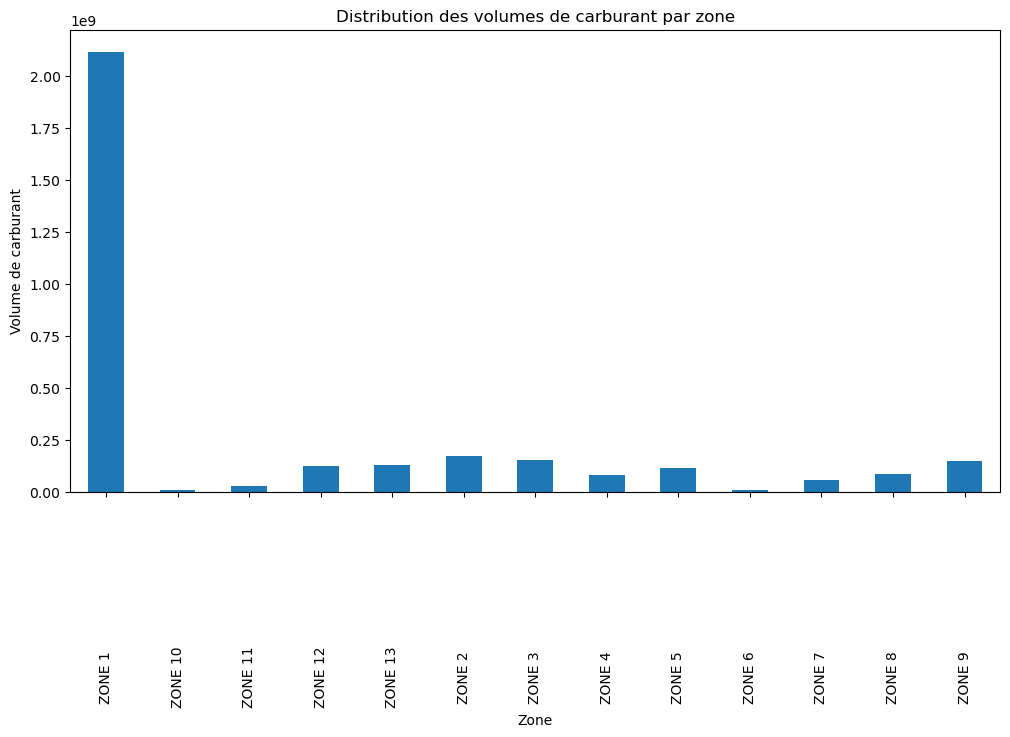

In [4]:
import matplotlib.pyplot as plt

# Exploration des données

# Visualisation de la distribution des volumes de carburant par zone
plt.figure(figsize=(12, 6))
data.groupby('ZONE')['VOLUME'].sum().plot(kind='bar')
plt.title('Distribution des volumes de carburant par zone')
plt.xlabel('Zone')
plt.ylabel('Volume de carburant')
plt.show()

# Visualisation de la distribution des volumes de carburant par date
plt.figure(figsize=(12, 6))
data.groupby('DATE')['VOLUME'].sum().plot()
plt.title('Distribution des volumes de carburant par date')
plt.xlabel('Date')
plt.ylabel('Volume de carburant')
plt.show()


## VOLUME DE CARBURANT PAR MOIS AU FIL DES ANNEES 

<Figure size 1200x600 with 0 Axes>

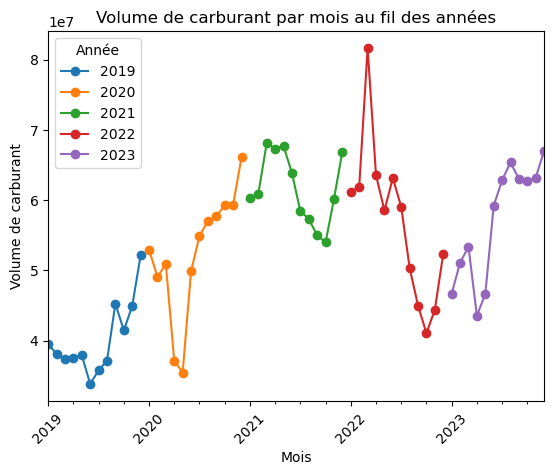

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin du fichier Excel
file_path = "C:\\Users\\MM_DATA\\Desktop\\PIST\\Prediction\\Etat_des_sorties_final.xlsx"

# Lecture du fichier Excel
data = pd.read_excel(file_path)

# Conversion de la colonne DATE en datetime 
if not pd.api.types.is_datetime64_any_dtype(data['DATE']):
    data['DATE'] = pd.to_datetime(data['DATE'])

# Création d'une colonne 'Mois' pour regrouper les données par mois
data['Mois'] = data['DATE'].dt.to_period('M')

# Exploration des données supplémentaires

# Volume de carburant par mois au fil des années
plt.figure(figsize=(12, 6))
data.groupby(['Mois', data['DATE'].dt.year])['VOLUME'].sum().unstack().plot(marker='o', linestyle='-')
plt.title('Volume de carburant par mois au fil des années')
plt.xlabel('Mois')
plt.ylabel('Volume de carburant')
plt.legend(title='Année')
plt.xticks(rotation=45)
plt.show()


## VOLUME DE GASOIL PAR MOIS AU FIL DES ANNEES 


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_10824\2757866586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

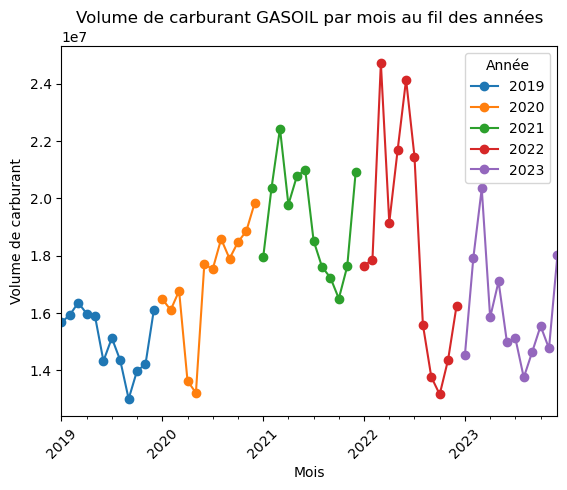

In [41]:
# Filtrer les données pour inclure uniquement le produit "SUPER" en tenant compte des espaces supplémentaires
super_data = data[data['PRODUIT'].str.strip() == 'GASOIL']

# Création d'une colonne 'Mois' pour regrouper les données par mois
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Volume de carburant "GASOIL" par mois au fil des années
plt.figure(figsize=(12, 6))
super_data.groupby(['Mois', super_data['DATE'].dt.year])['VOLUME'].sum().unstack().plot(marker='o', linestyle='-')
plt.title('Volume de carburant GASOIL par mois au fil des années')
plt.xlabel('Mois')
plt.ylabel('Volume de carburant')
plt.legend(title='Année')
plt.xticks(rotation=45)
plt.show()


## VOLUME DE SUPER PAR MOIS AU FIL DES ANNEES

In [34]:
# Convertir les valeurs de la colonne "VOLUME" en données numériques pour le produit "SUPER"
super_data['VOLUME'] = pd.to_numeric(super_data['VOLUME'], errors='coerce')

# Vérifier s'il y a des valeurs non numériques après la conversion
print(super_data['VOLUME'].isna().sum())


0


In [37]:
print(super_data.head())


Empty DataFrame
Columns: [N° B.C, N° B.L, MARKETER, N° B.E.C, DESTINATAIRE, PRODUIT, DATE, TRANSPORTEUR, TRACTEUR, CITERNE, ZONE, TYPE DOUANE, VOLUME, Mois]
Index: []


In [38]:
print(data['PRODUIT'].unique())


['SUPER                                   '
 'GASOIL                                  '
 'JET A1                                  '
 'PETROLE                                 '
 'D.D.O                                   ']


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_10824\3506316489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

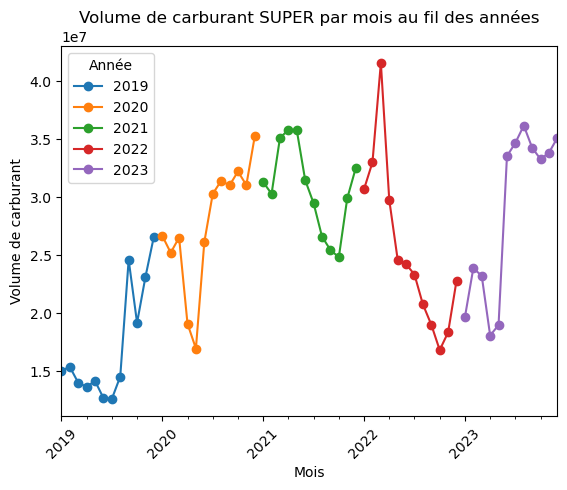

In [39]:
# Filtrer les données pour inclure uniquement le produit "SUPER" en tenant compte des espaces supplémentaires
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Création d'une colonne 'Mois' pour regrouper les données par mois
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Volume de carburant "SUPER" par mois au fil des années
plt.figure(figsize=(12, 6))
super_data.groupby(['Mois', super_data['DATE'].dt.year])['VOLUME'].sum().unstack().plot(marker='o', linestyle='-')
plt.title('Volume de carburant SUPER par mois au fil des années')
plt.xlabel('Mois')
plt.ylabel('Volume de carburant')
plt.legend(title='Année')
plt.xticks(rotation=45)
plt.show()


## GASOIL ET SUPER SUR LE MEME GRAPH

In [46]:
print(filtered_data['PRODUIT'].unique())


['SUPER                                   '
 'GASOIL                                  ']


In [60]:
import matplotlib.pyplot as plt

# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])
grouped_data = combined_data.groupby(['Mois', combined_data['DATE'].dt.year, 'PRODUIT'])['VOLUME'].sum().unstack().unstack()

# Limiter les données jusqu'en 2023
grouped_data = grouped_data.loc[grouped_data.index.get_level_values('Mois').year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not grouped_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    grouped_data.plot(marker='o', linestyle='-')
    plt.title('Volume de carburant par mois au fil des années')
    plt.xlabel('Mois')
    plt.ylabel('Volume de carburant')
    plt.legend(title='Carburant')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Aucune donnée disponible pour tracer le graphique.")


Aucune donnée disponible pour tracer le graphique.


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_10824\2377765718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_10824\2377765718.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


In [ ]:
plt.subplot()

## VOLUME DE CARBURANT PAR TYPE DE PRODUITS 

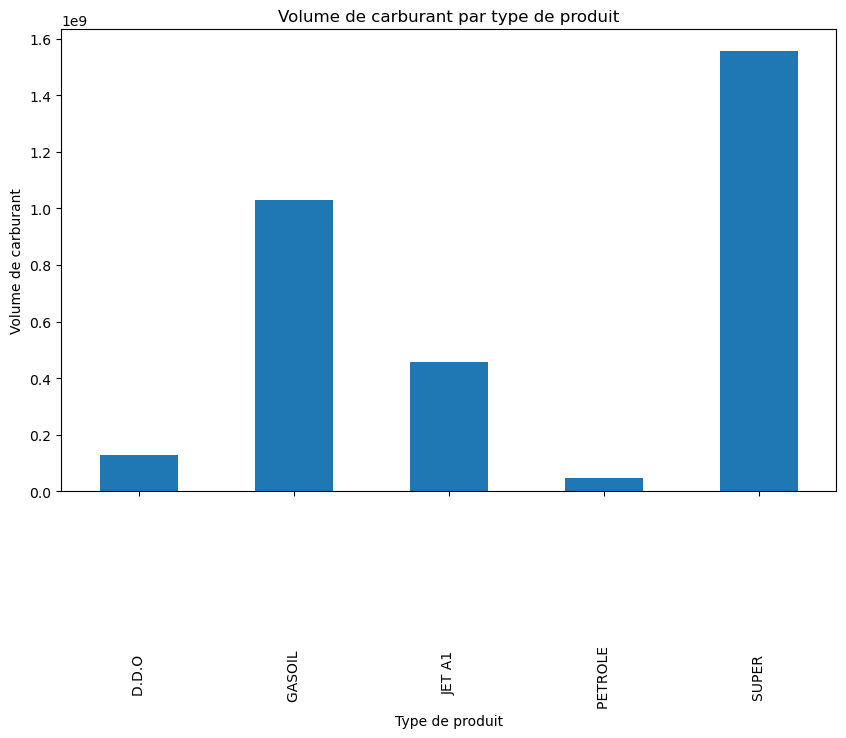

In [7]:
plt.figure(figsize=(10, 6))
data.groupby('PRODUIT')['VOLUME'].sum().plot(kind='bar')
plt.title('Volume de carburant par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Volume de carburant')
plt.show()


## VOLUME DE CARBURANT PAR MARKETER 

In [8]:
plt.figure(figsize=(12, 6))
data.groupby('MARKETER')['VOLUME'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Volume de carburant par Marketer')
plt.xlabel('Marketer')
plt.ylabel('Volume de carburant')
plt.show()


## VOLUME DE CARBURANT PAR DESTINATION (DESTINATAIRE)

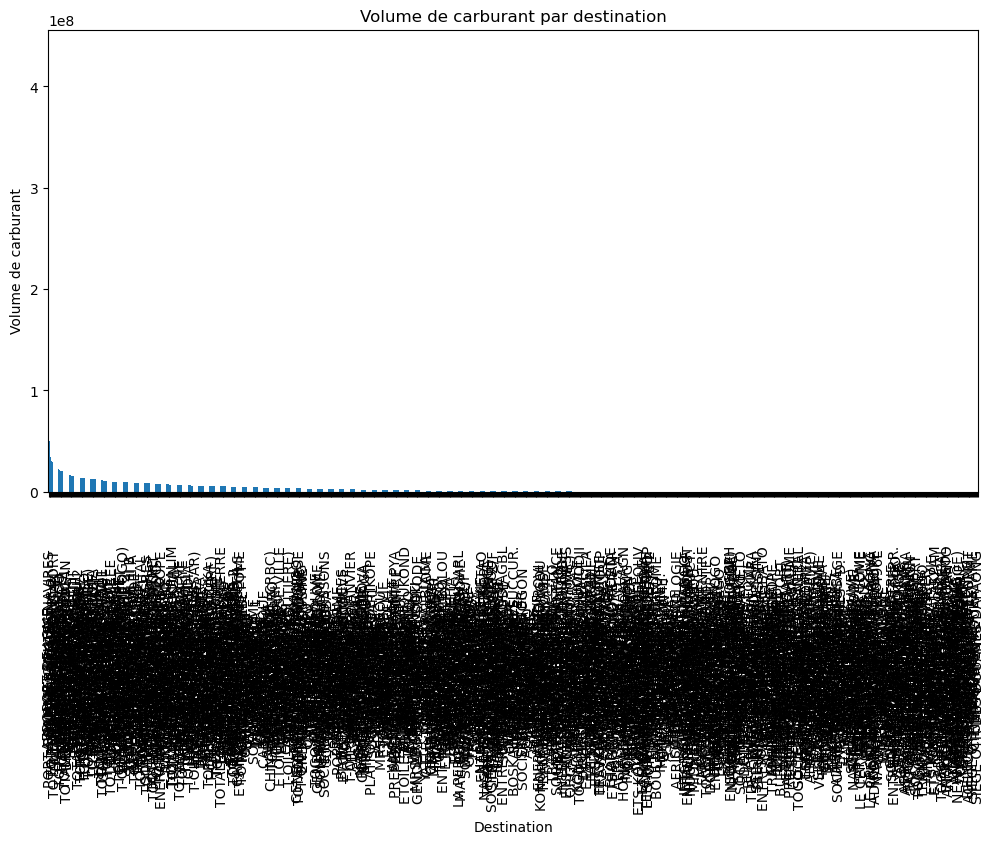

In [9]:
plt.figure(figsize=(12, 6))
data.groupby('DESTINATAIRE')['VOLUME'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Volume de carburant par destination')
plt.xlabel('Destination')
plt.ylabel('Volume de carburant')
plt.show()


## Volume de carburant par zone au fil du temps :

In [10]:
plt.figure(figsize=(12, 6))
data.groupby(['Mois', 'ZONE'])['VOLUME'].sum().unstack().plot(marker='o', linestyle='-')
plt.title('Volume de carburant par zone au fil du temps')
plt.xlabel('Mois')
plt.ylabel('Volume de carburant')
plt.legend(title='Zone')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

## Répartition du volume de carburant par transporteur :

In [11]:
plt.figure(figsize=(10, 6))
data.groupby('TRANSPORTEUR')['VOLUME'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.title('Répartition du volume de carburant par transporteur')
plt.ylabel('')
plt.show()


## Volume de carburant par type de douane :